# Future Weather Files Morphing Workflow



### Following the methodology from
https://weathershift.com/resources/public/Constructing%20Design%20Weather.pdf

### Set the DATADIR variable below and run the following cells

In [1]:
DATADIR = './GLOBAL/'

In [2]:
from ladybug.epw import EPW
from HelperFunctions import header_to_string, header_from_string, to_series, from_series, get_values, _factors_to_annual, _daily_to_annual, _plot_projection
from ForecastParametersFunctions import _forecast_dry_bulb_temperature, _forecast_relative_humidity, _forecast_atmospheric_pressure, _calculate_dew_point_temperature, _forecast_wind_speed, _forecast_sky_cover, _calculate_horizontal_infrared_radiation_intensity, _calculate_radiation_factor, _forecast_solar, _modify_ground_temperature, forecast_epw
import warnings

from pylab import rcParams
import matplotlib.pyplot as plt
import matplotlib
rcParams['figure.figsize'] = 15, 5
plt.style.use('ggplot')
font = {'family' : 'Arial',
        'size'   : 7}

matplotlib.rc('font', **font)

# MAIN

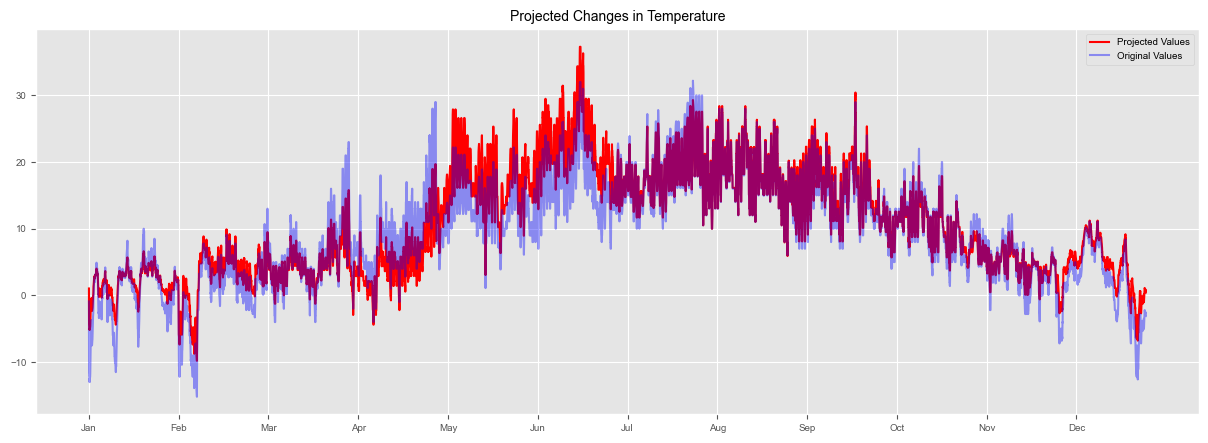

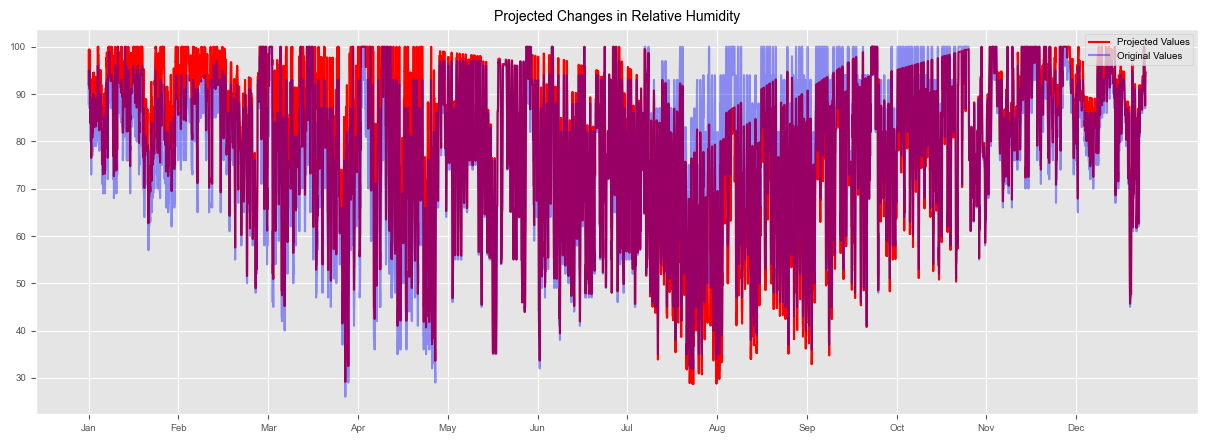

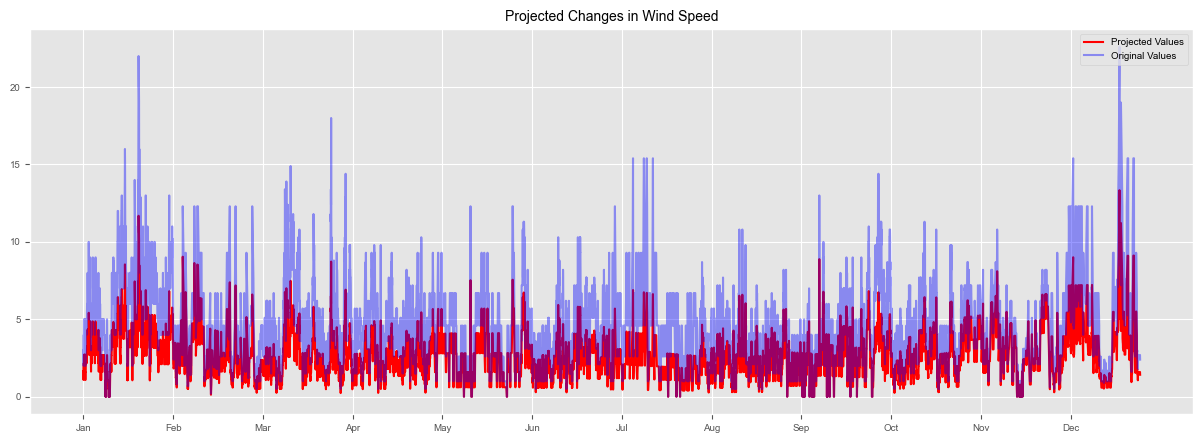

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:281: UserWarning: Forecast for wind speed returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


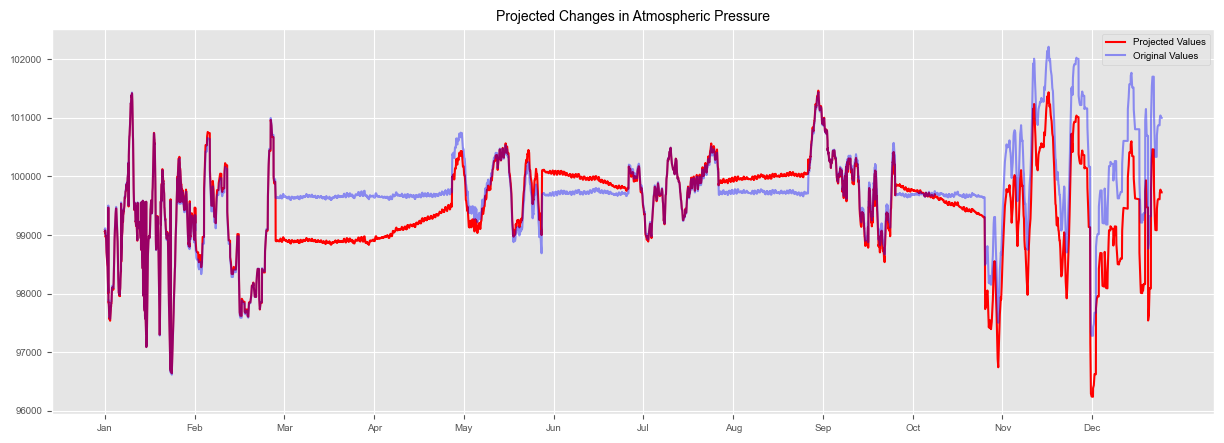

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:214: UserWarning: Forecast for atmospheric pressure returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


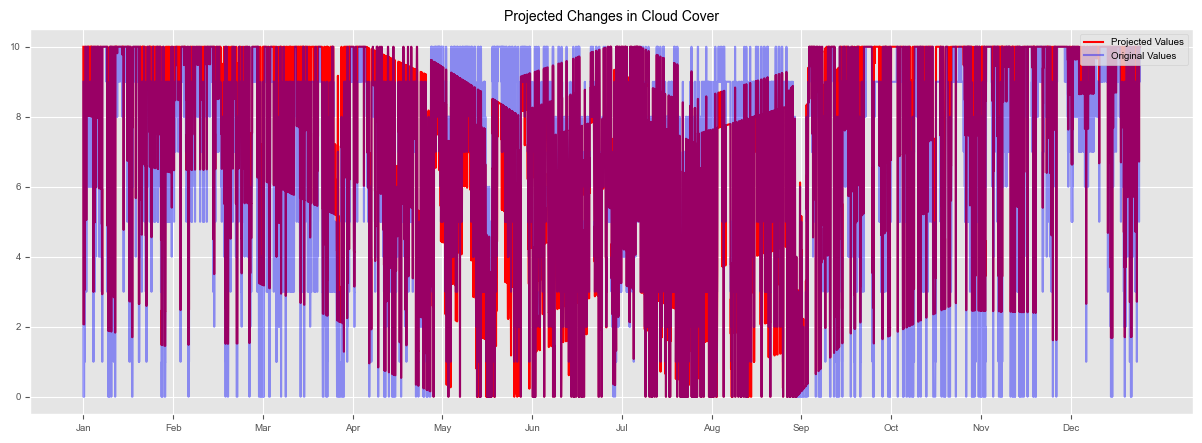

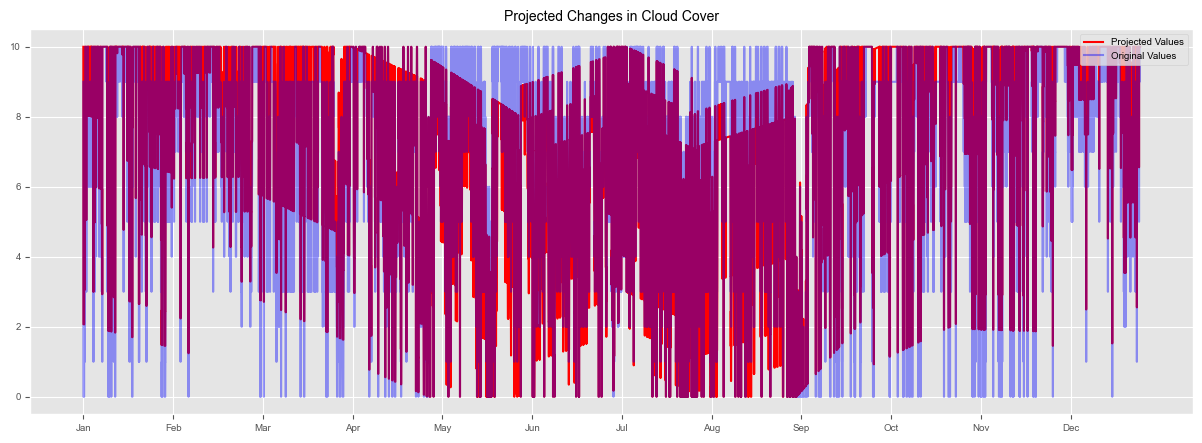

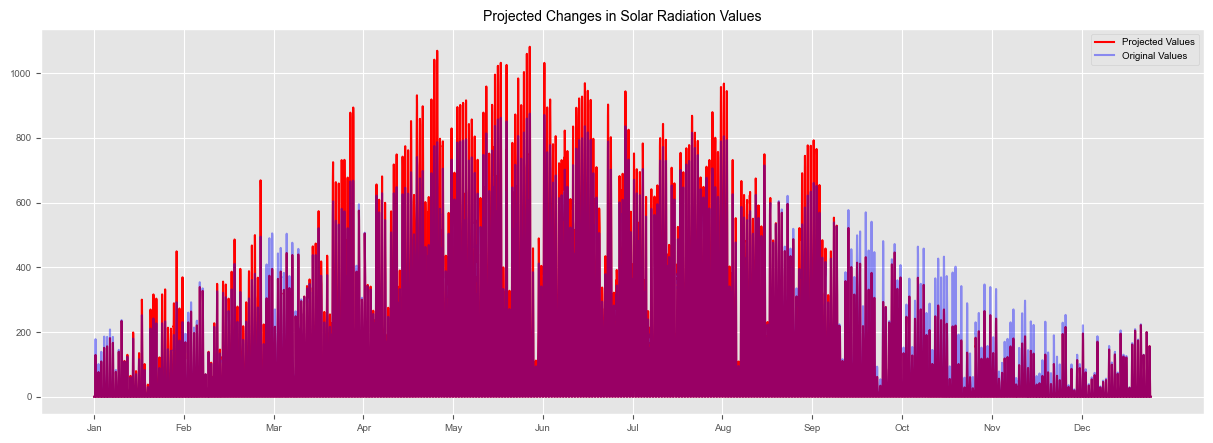

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


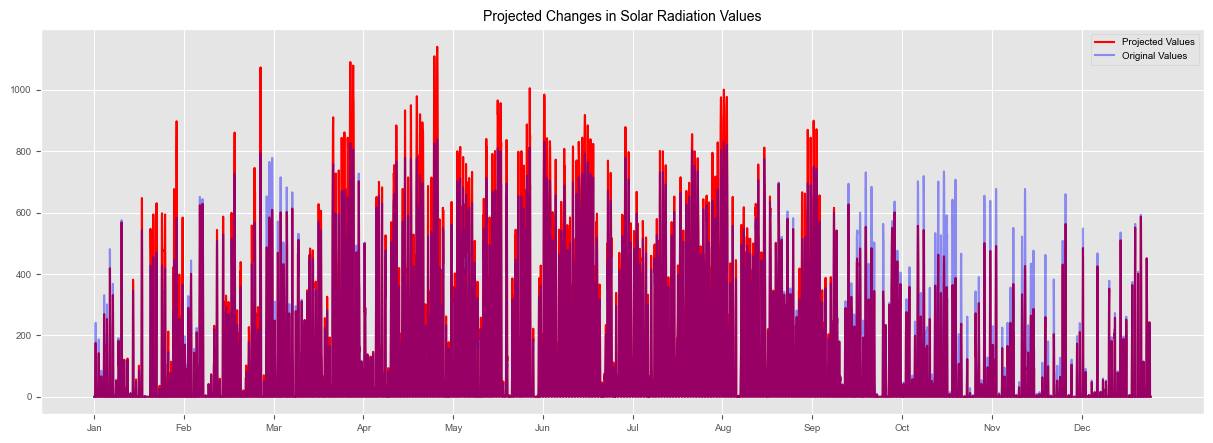

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


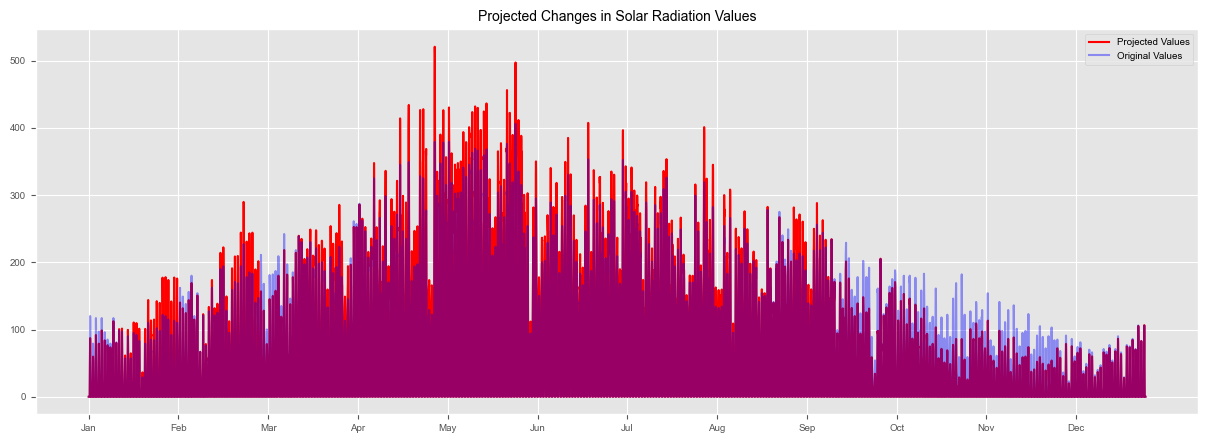

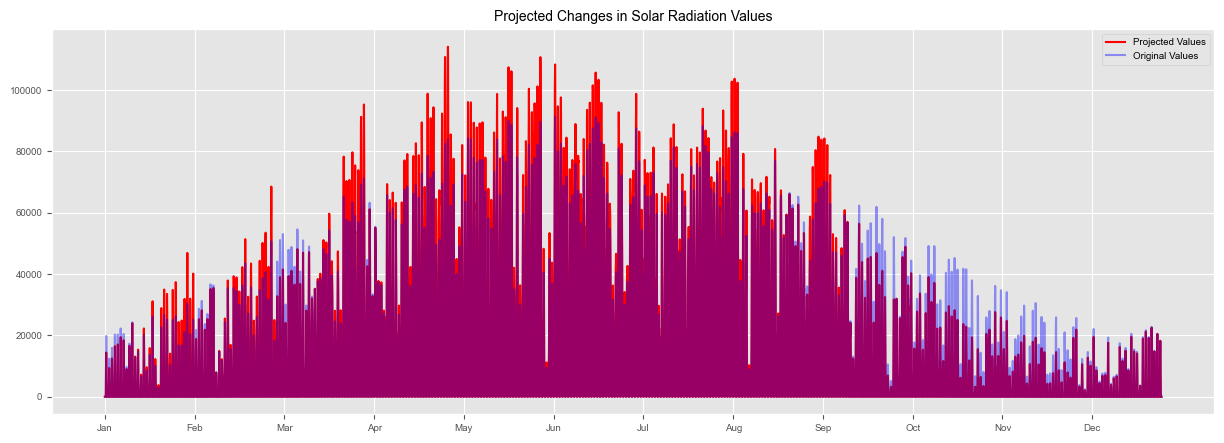

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


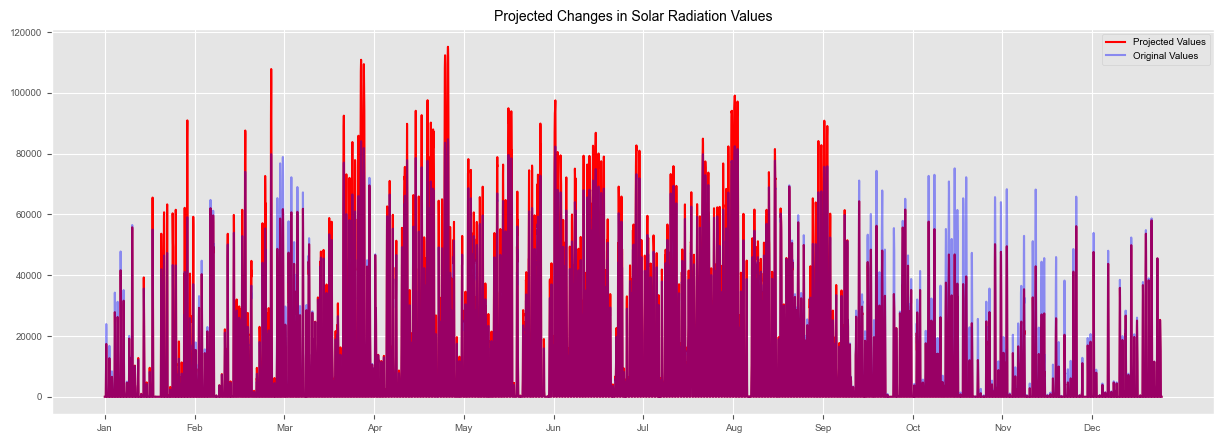

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


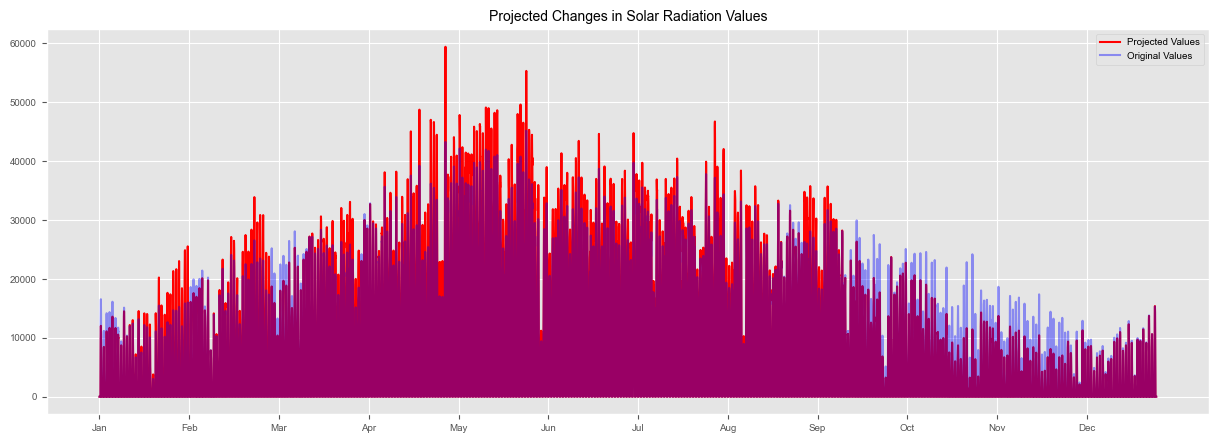

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


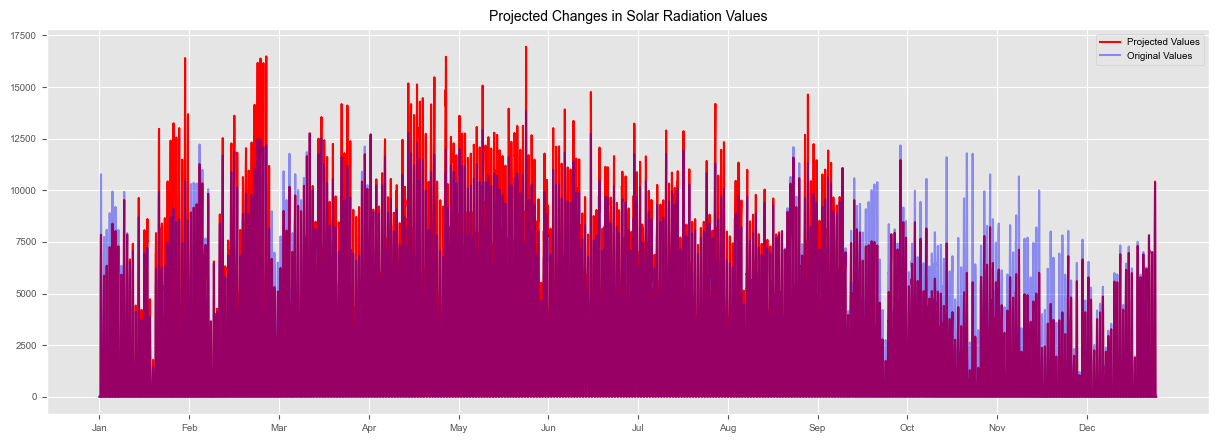

C:\Users\ebendo\Documents\GitHub\Future-Weather-Files-Morphing-Workflow\ForecastParametersFunctions.py:441: UserWarning: Forecast for solar values returns values beyond feasible range of transformation. The original data will be returned instead.
  warnings.warn(


'LOCATION,Leipzig.Halle.AP,SN,DEU,SRC-TMYx,104690,51.4347,12.2397,1.0,135.5\nDESIGN CONDITIONS,0\nTYPICAL/EXTREME PERIODS,0,\nGROUND TEMPERATURES,3,0.5,,,,15.55,21.95,0.95,0.99,7.35,13.23,13.84,16.99,19.12,16.74,13.39,20.55,2.0,,,,23.99,54.16,2.90,1.84,6.96,11.02,11.33,14.23,16.75,15.63,13.75,24.41,4.0,,,,29.49,80.82,4.86,2.92,7.81,10.24,9.72,11.96,14.33,13.94,13.16,25.83\nHOLIDAYS/DAYLIGHT SAVINGS,No,0,0,0\nCOMMENTS 1,"NCEI ISD/ERA5 - #years=[63] Period of Record=1934-2021; Jan=1986; Feb=1941; Mar=2021; Apr=2012; May=1936; Jun=2013; Jul=1943; Aug=2007; Sep=1981; Oct=2008; Nov=1967; Dec=1941". Forecast using transformation factors from the IPCC HadCM3 sp85 emissions scenario for 2050 according to the methodology from Jentsch M.F., James P.A.B., Bourikas L. and Bahaj A.S. (2013) Transforming existing weather data for worldwide locations to enable energy and building performance simulation under future climates, Renewable Energy, Volume 55, pp 514-524.\nCOMMENTS 2,"Downloaded from Climat

In [8]:
#Set original EPW file path
epw = EPW("./TestEPW/Leipzig.epw")
#Choose forecasting options
future_epw = forecast_epw(epw, "sp85", '2050', DATADIR)
#Save epw with a new title
future_epw.save("./Leipzig_sp26_2050.epw")

# Load and inspect Data of GCM

In [4]:
import os

"""
Set up Climate parameter paths based on GCM
For now there is 1 option:
GLOBAL- global climate model GCM with low resolution
"""
if (DATADIR=='./GLOBAL/'):
    gcm_nc_temp = glob(f'{DATADIR}tas_day_ACCESS-CM2*.nc')
    gcm_nc_tempmax = glob(f'{DATADIR}tasmax*.nc')
    gcm_nc_tempmin = glob(f'{DATADIR}tasmin*.nc')
    gcm_nc_rh = glob(f'{DATADIR}hurs_Amon_CanESM5*.nc')
    gcm_nc_wind= glob(f'{DATADIR}sfcWind_Amon_TaiESM1*.nc')
    gcm_nc_press= glob(f'{DATADIR}ps_Amon_CanESM5*.nc')
    gcm_nc_radiation = glob(f'{DATADIR}rsds_*.nc')
    gcm_nc_cloud = glob(f'{DATADIR}clt_*.nc')
    
else:
    warnings.warn('Select Valid GCM Dataset folder')

In [16]:
ds = xr.open_dataset(f'{DATADIR}{os.path.basename(gcm_nc_temp[0])}')
ds

<xarray.Dataset> Size: 121MB
Dimensions:    (time: 1096, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) datetime64[ns] 9kB 2030-01-01T12:00:00 ... 2050-12-31T1...
  * lat        (lat) float64 1kB -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * lon        (lon) float64 2kB 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 18kB ...
    lat_bnds   (lat, bnds) float64 2kB ...
    lon_bnds   (lon, bnds) float64 3kB ...
    tas        (time, lat, lon) float32 121MB ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    branch_method:          standard
    branch_time_in_child:   60265.0
    branch_time_in_parent:  60265.0
    creation_date:          2019-11-08T10:48:29Z
    ...                     ...
    variable_id:            tas
    variant_label:          r1i1p1f1
    version:                v20191108
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/eb81ae3b-30fb-4650-869d-e29b6e76a4e5
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [17]:
temp = ds['tas']
temp.values

array([[[257.28027, 257.2683 , 257.26514, ..., 257.49756, 257.48096,
         257.47363],
        [256.58276, 256.60474, 256.63013, ..., 256.45044, 256.46118,
         256.45776],
        [257.85303, 257.81494, 257.78662, ..., 257.94214, 257.9021 ,
         257.8694 ],
        ...,
        [244.71948, 243.74146, 243.5415 , ..., 245.49829, 245.35376,
         245.18652],
        [245.32104, 244.98022, 244.8628 , ..., 245.42627, 245.40625,
         245.38281],
        [246.25854, 246.14209, 246.24854, ..., 246.12573, 246.13232,
         246.2063 ]],

       [[257.85303, 257.83374, 257.823  , ..., 258.09717, 258.0691 ,
         258.06274],
        [258.0708 , 258.04858, 258.03516, ..., 258.01538, 258.0061 ,
         257.98438],
        [258.7893 , 258.7234 , 258.68896, ..., 259.0327 , 258.94092,
         258.89233],
        ...,
        [244.5083 , 243.45337, 243.16797, ..., 245.2461 , 245.16895,
         245.06763],
        [243.14575, 243.16284, 243.2605 , ..., 243.93604, 243.16455,
   